In [21]:
import numpy as np
import matplotlib.pyplot as plt

import snowwi_signal as filt

%matplotlib widget

fs: 1000.0


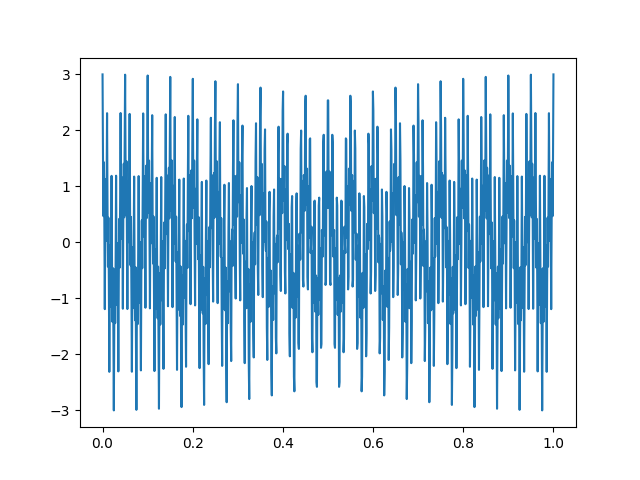

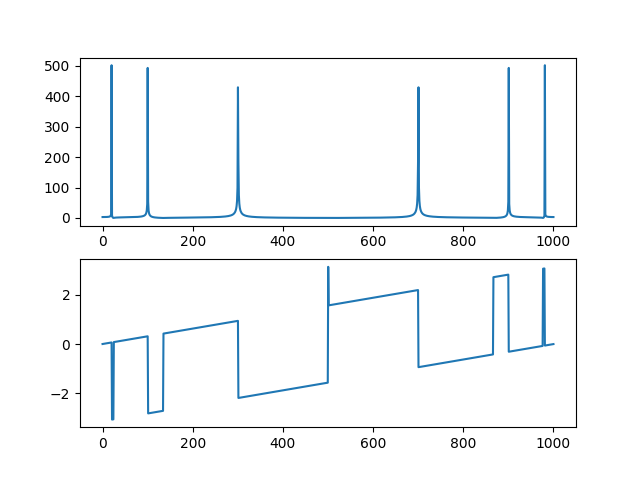

In [23]:
t = np.linspace(0, 1, 1000)

fs = len(t) / t.max()
print(f'fs: {fs}')

f1 = 20
f2 = 100
f3 = 300

test_signal = np.cos(2*np.pi*f1*t)
test_signal += np.cos(2*np.pi*f2*t)
test_signal += np.cos(2*np.pi*f3*t)

spect = np.fft.fft(test_signal)
freqs = np.linspace(0, fs, len(t))

plt.figure()
plt.plot(t, test_signal)

plt.figure()
plt.subplot(211)
plt.plot(freqs, abs(spect))

plt.subplot(212)
plt.plot(freqs, np.angle(spect))

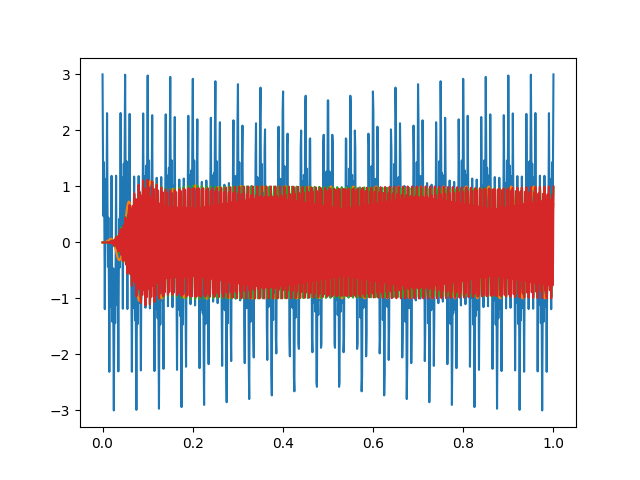

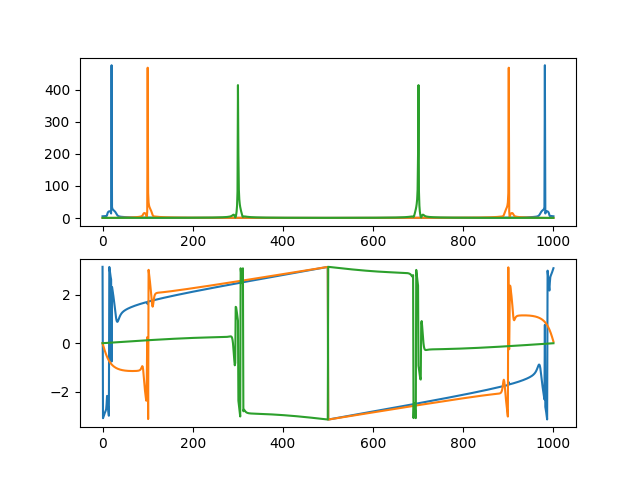

In [24]:
buff = 10

recovered1 = filt.butter_bandpass_filter(test_signal, f1 - buff, f1 + buff, fs)
recovered2 = filt.butter_bandpass_filter(test_signal, f2 - buff, f2 + buff, fs)
recovered3 = filt.butter_bandpass_filter(test_signal, f3 - buff, f3 + buff, fs)

spectrum1 = np.fft.fft(recovered1)
spectrum2 = np.fft.fft(recovered2)
spectrum3 = np.fft.fft(recovered3)

plt.figure()
plt.plot(t, test_signal)
plt.plot(t, recovered1)
plt.plot(t, recovered2)
plt.plot(t, recovered3)

plt.figure()
plt.subplot(211)
plt.plot(freqs, abs(spectrum1))
plt.plot(freqs, abs(spectrum2))
plt.plot(freqs, abs(spectrum3))

plt.subplot(212)
plt.plot(freqs, np.angle(spectrum1))
plt.plot(freqs, np.angle(spectrum2))
plt.plot(freqs, np.angle(spectrum3))

10000


/var/folders/pq/8hx5j6f10ng1xmvrlghd153h0000h2/T/ipykernel_21880/960587036.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


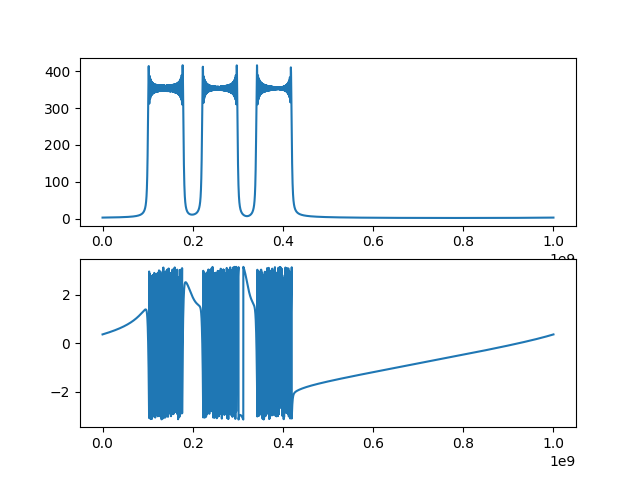

In [30]:
# Now with the 3 bands

from snowwi_signal import exp_chirp

f0_low = 100e6
f0_high = 220e6
f0_c = 340e6

bw = 80e6

fs = 1e9
tp = 10e-6

N = int(fs*tp)
print(N)

t = np.linspace(0, tp, N)

test_chirp = exp_chirp(t, f0_low, t[-1], f0_low + bw)
test_chirp += exp_chirp(t, f0_high, t[-1], f0_high + bw)
test_chirp += exp_chirp(t, f0_c, t[-1], f0_c + bw)

test_spect = np.fft.fft(test_chirp)
freqs = np.linspace(0, fs, len(test_spect))

plt.figure()
plt.subplot(211)
plt.plot(freqs, abs(test_spect))
plt.subplot(212)
plt.plot(freqs, np.angle(test_spect))

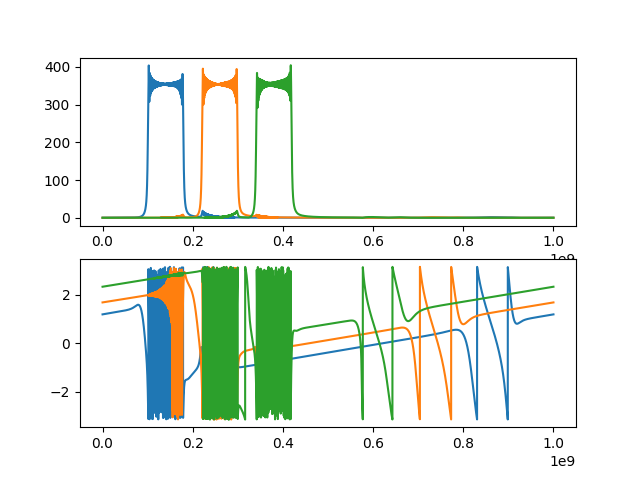

: 

In [36]:
# Let's recover it

buff = 5e6

recovered1 = filt.butter_bandpass_filter(test_chirp, f0_low - buff, f0_low + bw + buff, fs, order=6)
recovered2 = filt.butter_bandpass_filter(test_chirp, f0_high - buff, f0_high + bw + buff, fs, order=6)
recovered3 = filt.butter_bandpass_filter(test_chirp, f0_c - buff, f0_c + bw + buff, fs, order=6)

spect1 = np.fft.fft(recovered1)
spect2 = np.fft.fft(recovered2)
spect3 = np.fft.fft(recovered3)

plt.figure()
plt.subplot(211)
plt.plot(freqs, abs(spect1))
plt.plot(freqs, abs(spect2))
plt.plot(freqs, abs(spect3))
plt.subplot(212)
plt.plot(freqs, np.angle(spect1))
plt.plot(freqs, np.angle(spect2))
plt.plot(freqs, np.angle(spect3))